In [9]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats

In [3]:

#following this tutorial for chi square test: https://www.statology.org/chi-square-goodness-of-fit-test-python/

X=[]
Y=[]
Err=[]

#issues with uploading data file followed this tutorial - https://www.geeksforgeeks.org/how-to-plot-data-from-a-text-file-using-matplotlib/

with open('data.txt', 'r') as df:
    #Because the data file had string values instead of float have to convert
    lines=df.read().split('\n')
    lines=list(filter(None,lines))
    
    for line in lines:
        
        v=line.split()
        X.append(float(v[0]))
        Y.append(float(v[1]))
        Err.append(float(v[2]))






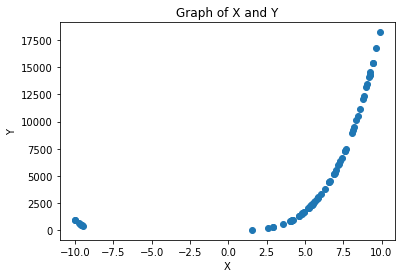

In [4]:
plt.scatter(X, Y)
plt.title('Graph of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
for i in range(len(Err)):
    plt.errorbar(X,Y,yerr=Err[i],ls='none')
plt.show()


In [5]:


# Null hypothesis is a x^4 function

x=np.array(X)
y=np.array(Y)
Err=np.array(Err)

def Null_hyp(x,a,b,c,d,e):
    return a*x**4+b*x**3+c*x**2+d*x+e

#curve fitting to find what the function is
coeff, pcov=curve_fit(Null_hyp,x,y)

[a, b, c, d, e,] = coeff
print ('a=', round(a,2)) 
print ('b=', round(b,2))
print ('c=', round(c,2))
print ('d=', round(d,2))
print ('e=', round(e,2))

print(pcov)


a= 1.0
b= 9.0
c= 0.0
d= 1.97
e= 0.06
[[ 2.28588826e-07 -1.78572039e-06 -1.78818496e-05  1.74372032e-04
  -3.18535643e-04]
 [-1.78572039e-06  1.78219030e-05  1.26303689e-04 -1.70399377e-03
   3.97202374e-03]
 [-1.78818496e-05  1.26303689e-04  1.46460509e-03 -1.24400452e-02
   1.87209235e-02]
 [ 1.74372032e-04 -1.70399377e-03 -1.24400452e-02  1.63775314e-01
  -3.77731147e-01]
 [-3.18535643e-04  3.97202374e-03  1.87209235e-02 -3.77731147e-01
   1.09939114e+00]]


In [6]:

A=[]
B=[]

#the new curve of the null hypothesis with new points
i=0
while i<len(x):
    null_x=x[i]
    null_y=a*x**4+b*x**3+c*x**2+d*x+e
    A.append(null_x)
    B.append(null_y)
    i=i+1
    continue

#chi square test below

[stat, pvalue]=stats.chisquare(f_obs=Y, f_exp=null_y)

if pvalue > 0.05:
    print("Null Hypothesis has a pvalue of", pvalue, "which is greater than 0.05 \n" 
           "thus the null hypothesis is true")


Null Hypothesis has a pvalue of 1.0 which is greater than 0.05 
thus the null hypothesis is true


In [7]:
#Now repeating all earlier steps for alternative hypothesis

#alternative hypothesis is a x^2 func because this looks even
def Alt_hyp(x,f,g,h):
    return f*x**2+g*x+h

coeff2, pcov=curve_fit(Alt_hyp,x,y)

[f,g,h] = coeff2
print ('f=', round(f,2)) 
print ('g=', round(g,2))
print ('h=', round(h,2))
print (pcov)


f= 136.29
g= 722.92
h= -5044.7
[[ 2.21144749e+01  2.11519499e+01 -1.21210943e+03]
 [ 2.11519499e+01  6.66559342e+02 -4.28295596e+03]
 [-1.21210943e+03 -4.28295596e+03  9.88745727e+04]]


In [8]:

C=[]
D=[]

i=0
while i<len(x):
    alt_x=x[i]
    alt_y=f*x**2+g*x+h
    C.append(alt_x)
    D.append(alt_y)
    i=i+1
    continue

[stats2, pvalue2]=stats.chisquare(f_obs=Y, f_exp=alt_y)

if pvalue < 0.05:
    print("alternative hypothesis has a pvalue of", pvalue2, "which is greater than 0.05 \n" 
           "thus the null hypothesis is true")
else: 
    print("alternative hypothesis has a pvalue of", pvalue2, "which is less than 0.05 \n"
         "thus the alternative hypothesis is not true")




alternative hypothesis has a pvalue of 0.0 which is less than 0.05 
thus the alternative hypothesis is not true


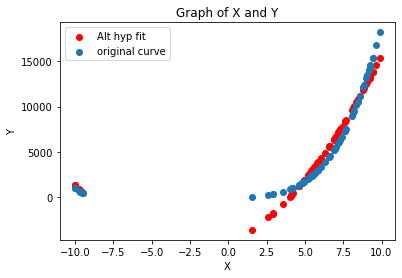

In [11]:
fig=plt.figure()
ax1=fig.add_subplot(111)
#ax2=fig.add_subplot(111)

#ax1.scatter(x, Null_hyp(x,coeff[0],coeff[1],coeff[2],coeff[3],coeff[4]), label="Null hyp fit", color="green")
ax1.scatter(x, Alt_hyp(x,coeff2[0],coeff2[1], coeff2[2]), label="Alt hyp fit", color="red")
ax1.scatter(x, Y, label="original curve")
plt.legend(loc='upper left')
plt.title('Graph of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()